79.8622778205997
0.02091580758879556


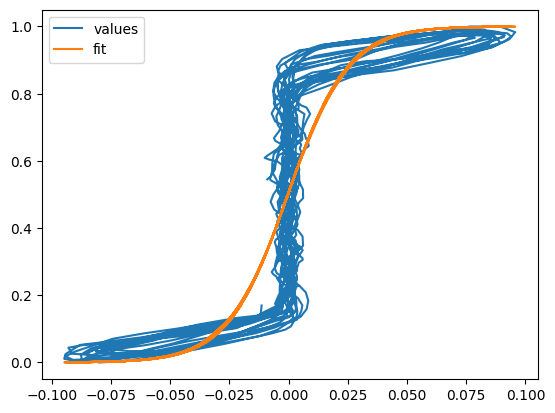

0.7581273684474135
Given control valve has stiction


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import math
from scipy.optimize import curve_fit
from scipy import stats

xlsx = pd.ExcelFile("/content/data.xlsx")
data = pd.read_excel(xlsx, 'CHEM23',header=0)

data = np.array(data)
OP = data[:,0]
PV = data[:,1]
SP = data[:,2]

OP = OP.reshape(1,data.shape[0])
PV = PV.reshape(1,data.shape[0])
SP = SP.reshape(1,data.shape[0])

PV_low=np.min(PV);
PV_high=np.max(PV);

OP_low=np.min(OP);
OP_high=np.max(OP);

PV=((PV-PV_low)/(PV_high-PV_low))*1;
OP=((OP-OP_low)/(OP_high-OP_low))*1;
SP=((SP-PV_low)/(PV_high-PV_low))*1;

def sigmoidfn(x,a,b):
  z = a*x+b
  z = np.array(z)
  y = 1/(1+np.exp(-z))
  return y

xdata = np.diff(PV)
ydata = OP[:,1:]

n = xdata.shape[1]

xdata.shape = (n,)
ydata.shape = (n,)

parameters, covariance = curve_fit(sigmoidfn, xdata, ydata)
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

y_fit = sigmoidfn(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, label="values")
plt.plot(xdata, y_fit, label="fit")

plt.legend()
plt.show()

(R, pval) = stats.pearsonr(ydata.flatten(),y_fit.flatten())
print(R)

# stiction detection
if R<0.5:
  print('Given control valve has no stiction')
else:
  print('Given control valve has stiction')

